# Decision Trees
Estimated time needed: **15** minutes

## Objective: 
*   Identifying DDOS or BENIGN


## Libraries used:
*   pandas
*   sklearn(RandomForestClassifier)
*   matplotlib


In [1]:
import pandas as pd

### Dataset
*   The "DDoS Balanced & Unbalanced Datasets" dataset, published on Kaggle, is a specialized dataset for detecting Distributed Denial of Service (DDoS) activity. It is a combination of public datasets (CIC DoS, CI-CIDS 2017, and CSE-CIC-IDS 2018) and contains 84 features designed to analyze traffic networks and identify DDoS usage patterns.
*   This dataset has more than 12 million records.
*   In this dataset, the types of attacks are not examined. Rather, whether the request is a DDOS or BENIGN is examined.
*   To download the dataset: https://www.kaggle.com/datasets/devendra416/ddos-datasets

#### Step 1 :
*   Initially, because the dataset is very large, we only read its column names to select the best features.
*   After selecting the important columns, when reading the data, we extract only those columns.

In [2]:
df = pd.read_csv("final_dataset.csv" , nrows=1)
columns = []
for col in df.columns:
    columns.append(col)
    
print(columns)
print(len(columns))

['Unnamed: 0', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd B

In [3]:
selected_features = [
    'Fwd Pkt Len Max', 'TotLen Fwd Pkts', 'ACK Flag Cnt', 'SYN Flag Cnt',
    'Flow Duration', 'Tot Fwd Pkts', 'Bwd Pkt Len Max', 'Tot Bwd Pkts',
    'RST Flag Cnt', 'Fwd Pkts/s', 'Init Fwd Win Byts','Label'
]

In [4]:
df = pd.read_csv("final_dataset.csv" , usecols=selected_features)

In [5]:
df.head(5)

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkts/s,SYN Flag Cnt,RST Flag Cnt,ACK Flag Cnt,Init Fwd Win Byts,Label
0,3974862,29,44,86.0,86.0,1460.0,7.295851,1,0,0,-1,ddos
1,63,1,1,0.0,0.0,0.0,15873.015873,0,0,1,-1,ddos
2,476078,2,6,86.0,86.0,1460.0,4.200992,1,0,0,-1,ddos
3,151,2,1,0.0,0.0,0.0,13245.033113,0,0,1,-1,ddos
4,472507,2,5,73.0,73.0,1050.0,4.232742,1,0,0,-1,ddos


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12794627 entries, 0 to 12794626
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Flow Duration      int64  
 1   Tot Fwd Pkts       int64  
 2   Tot Bwd Pkts       int64  
 3   TotLen Fwd Pkts    float64
 4   Fwd Pkt Len Max    float64
 5   Bwd Pkt Len Max    float64
 6   Fwd Pkts/s         float64
 7   SYN Flag Cnt       int64  
 8   RST Flag Cnt       int64  
 9   ACK Flag Cnt       int64  
 10  Init Fwd Win Byts  int64  
 11  Label              object 
dtypes: float64(4), int64(7), object(1)
memory usage: 1.1+ GB


*   Check Nan :

In [7]:
print(df.isna().sum())

Flow Duration        0
Tot Fwd Pkts         0
Tot Bwd Pkts         0
TotLen Fwd Pkts      0
Fwd Pkt Len Max      0
Bwd Pkt Len Max      0
Fwd Pkts/s           0
SYN Flag Cnt         0
RST Flag Cnt         0
ACK Flag Cnt         0
Init Fwd Win Byts    0
Label                0
dtype: int64


In [8]:
df.tail(5)

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkts/s,SYN Flag Cnt,RST Flag Cnt,ACK Flag Cnt,Init Fwd Win Byts,Label
12794622,50,1,1,0.0,0.0,0.0,20000.000000,0,0,1,172,Benign
12794623,306,3,0,46.0,46.0,0.0,9803.921569,0,0,1,254,Benign
12794624,362,1,1,45.0,45.0,61.0,2762.430939,0,0,0,-1,Benign
12794625,303,1,1,47.0,47.0,63.0,3300.330033,0,0,0,-1,Benign
12794626,54,2,0,0.0,0.0,0.0,37037.037037,0,0,1,2238,Benign


*   Checking for duplicate values :

In [9]:
duplicate_count = df.duplicated().sum()
print(duplicate_count)

5676719


*   Duplicate values ​​in this dataset are created due to the nature of DDoS attacks, the combination of data from different sources, and the data generation and preprocessing processes. These duplicates can be both useful (to reveal attack patterns) and challenging (for analysis and model training). Duplicate data has been removed here.

In [10]:
duplicates = df[df.duplicated(keep=False)]

In [11]:
duplicates.head(10)

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkts/s,SYN Flag Cnt,RST Flag Cnt,ACK Flag Cnt,Init Fwd Win Byts,Label
1,63,1,1,0.0,0.0,0.0,15873.015873,0,0,1,-1,ddos
3,151,2,1,0.0,0.0,0.0,13245.033113,0,0,1,-1,ddos
5,138,1,1,0.0,0.0,0.0,7246.376812,0,0,1,-1,ddos
7,1978,1,1,0.0,0.0,0.0,505.561173,0,0,1,-1,ddos
9,102,1,1,0.0,0.0,0.0,9803.921569,0,0,1,-1,ddos
11,39,1,1,0.0,0.0,0.0,25641.025641,0,0,1,-1,ddos
13,6,1,1,0.0,0.0,0.0,166666.666667,0,0,1,-1,ddos
15,6,1,1,0.0,0.0,0.0,166666.666667,0,0,1,-1,ddos
17,6,1,1,0.0,0.0,0.0,166666.666667,0,0,1,-1,ddos
19,6,1,1,0.0,0.0,0.0,166666.666667,0,0,1,-1,ddos


In [12]:
df = df.drop_duplicates(keep='first')

In [13]:
df.index = range(1, len(df) + 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7117908 entries, 1 to 7117908
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Flow Duration      int64  
 1   Tot Fwd Pkts       int64  
 2   Tot Bwd Pkts       int64  
 3   TotLen Fwd Pkts    float64
 4   Fwd Pkt Len Max    float64
 5   Bwd Pkt Len Max    float64
 6   Fwd Pkts/s         float64
 7   SYN Flag Cnt       int64  
 8   RST Flag Cnt       int64  
 9   ACK Flag Cnt       int64  
 10  Init Fwd Win Byts  int64  
 11  Label              object 
dtypes: float64(4), int64(7), object(1)
memory usage: 651.7+ MB


#### Step 2 :
*   We get a copy of the original dataset.
*   Convert the Label column to a number.

In [14]:
df_selected = df.copy()

In [15]:
df_selected['Label'].value_counts()

Label
Benign    3851662
ddos      3266246
Name: count, dtype: int64

In [16]:
df_selected['Label'] = df_selected['Label'].apply(lambda x: 0 if x == 'Benign' else 1)
print(df_selected['Label'].value_counts()) 
# 0 ---> Benign
# 1 ---> ddos

Label
0    3851662
1    3266246
Name: count, dtype: int64


In [17]:
df_selected.head(10)

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkts/s,SYN Flag Cnt,RST Flag Cnt,ACK Flag Cnt,Init Fwd Win Byts,Label
1,3974862,29,44,86.0,86.0,1460.0,7.295851,1,0,0,-1,1
2,63,1,1,0.0,0.0,0.0,15873.015873,0,0,1,-1,1
3,476078,2,6,86.0,86.0,1460.0,4.200992,1,0,0,-1,1
4,151,2,1,0.0,0.0,0.0,13245.033113,0,0,1,-1,1
5,472507,2,5,73.0,73.0,1050.0,4.232742,1,0,0,-1,1
6,138,1,1,0.0,0.0,0.0,7246.376812,0,0,1,-1,1
7,469596,2,5,69.0,69.0,890.0,4.258980,1,0,0,-1,1
8,1978,1,1,0.0,0.0,0.0,505.561173,0,0,1,-1,1
9,468629,2,5,70.0,70.0,669.0,4.267768,1,0,0,-1,1
10,102,1,1,0.0,0.0,0.0,9803.921569,0,0,1,-1,1


#### Step 3 :
*   Separating training and testing data.
*   The RandomForest model is used.

In [18]:
from sklearn.model_selection import train_test_split
X = df_selected.drop(['Label'] , axis=1) 
y = df_selected['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y , shuffle=True)
print(X_train.shape)
print(X_test.shape)

(5694326, 11)
(1423582, 11)


In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=25 , criterion='entropy' , max_depth=10)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=25)

#### Step 4 :
*   Model evaluation using confusion matrix.
*   Specifying the order of importance of features in the model.
*   Checking overfit and underfit.


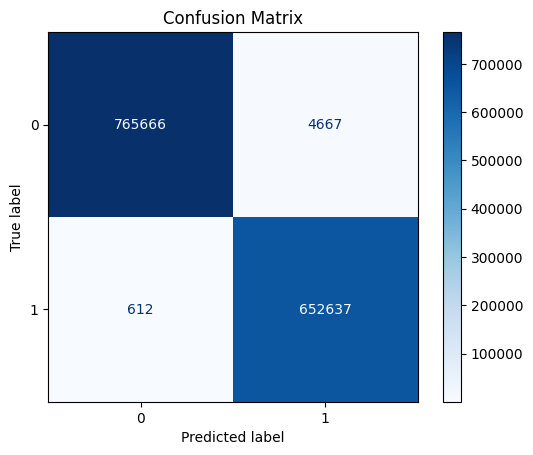

              precision    recall  f1-score   support

           0    0.99920   0.99394   0.99656    770333
           1    0.99290   0.99906   0.99597    653249

    accuracy                        0.99629   1423582
   macro avg    0.99605   0.99650   0.99627   1423582
weighted avg    0.99631   0.99629   0.99629   1423582



In [20]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred, digits=5))

In [21]:
importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
print(importances.sort_values(by='Importance', ascending=False))

              Feature  Importance
4     Fwd Pkt Len Max    0.218551
1        Tot Fwd Pkts    0.151387
3     TotLen Fwd Pkts    0.138789
5     Bwd Pkt Len Max    0.119768
10  Init Fwd Win Byts    0.089735
9        ACK Flag Cnt    0.077155
2        Tot Bwd Pkts    0.072772
0       Flow Duration    0.049322
6          Fwd Pkts/s    0.042834
7        SYN Flag Cnt    0.036122
8        RST Flag Cnt    0.003565


In [22]:
from sklearn.metrics import accuracy_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.6f}")
print(f"Test Accuracy:  {test_acc:.6f}")

Train Accuracy: 0.996347
Test Accuracy:  0.996292
